In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import folium
from folium import plugins

C:\Users\Raghunandan\Anaconda3\Anaconda33\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Extract Austin crime data

URL: "https://data.austintexas.gov/api/views/vmn9-3bvu/rows.csv?accessType=DOWNLOAD"

In [2]:
data = pd.read_csv("https://data.austintexas.gov/api/views/vmn9-3bvu/rows.csv?accessType=DOWNLOAD")

In [4]:
# verify the datatypes of the variables
data.tail(10)

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
102569,20185052550,BURGLARY OF VEHICLE,601,N,12/31/2018 12:00:00 AM,12/31/2018,0,12/31/2018 10:07:00 AM,12/31/2018,1007,...,18.11,N,01/02/2019,23F,Theft,3132375.0,3132375.0,30.325423,-97.684002,"(30.32542325, -97.68400241)"
102570,20183650125,DRIVING WHILE INTOX / FELONY,2109,N,12/31/2018 02:22:00 AM,12/31/2018,222,12/31/2018 04:59:00 AM,12/31/2018,459,...,23.19,C,12/31/2018,NaN,NaN,3146556.0,3146556.0,30.198057,-97.642594,"(30.19805654, -97.64259413)"
102571,20183651424,FAMILY DISTURBANCE,3400,N,12/31/2018 07:42:00 PM,12/31/2018,1942,12/31/2018 07:42:00 PM,12/31/2018,1942,...,NaN,N,01/04/2019,NaN,NaN,3123464.0,3123464.0,30.376992,-97.710853,"(30.37699184, -97.71085251)"
102572,20183651328,RUNAWAY CHILD,4100,N,12/31/2018 07:15:00 PM,12/31/2018,1915,12/31/2018 07:15:00 PM,12/31/2018,1915,...,NaN,N,01/03/2019,NaN,NaN,3110508.0,3110508.0,30.196802,-97.756765,"(30.19680199, -97.75676478)"
102573,20185052615,THEFT BY SHOPLIFTING,607,N,12/29/2018 05:17:00 PM,12/29/2018,1717,12/31/2018 03:53:00 PM,12/31/2018,1553,...,NaN,N,01/01/2019,23C,Theft,3097938.0,3097938.0,30.449773,-97.789904,"(30.44977308, -97.78990383)"
102574,20183650833,RAPE,200,N,12/31/2018 12:00:00 PM,12/31/2018,1200,12/31/2018 05:04:00 PM,12/31/2018,1704,...,NaN,N,06/25/2019,11A,Rape,0.0,0.0,NaN,NaN,NaN
102575,20183651230,FAMILY DISTURBANCE,3400,N,12/31/2018 06:20:00 PM,12/31/2018,1820,12/31/2018 06:20:00 PM,12/31/2018,1820,...,NaN,N,01/21/2019,NaN,NaN,3096240.0,3096240.0,30.212695,-97.801523,"(30.21269493, -97.80152309)"
102576,20185052614,THEFT,600,N,12/31/2018 02:00:00 AM,12/31/2018,200,12/31/2018 03:42:00 PM,12/31/2018,1542,...,NaN,N,01/02/2019,23H,Theft,3115650.0,3115650.0,30.266624,-97.738609,"(30.2666238, -97.73860907)"
102577,20183650521,FAMILY DISTURBANCE,3400,N,12/31/2018 11:16:00 AM,12/31/2018,1116,12/31/2018 11:16:00 AM,12/31/2018,1116,...,NaN,N,01/17/2019,NaN,NaN,3136581.0,3136581.0,30.278775,-97.671954,"(30.27877475, -97.67195423)"
102578,20183650088,ASSAULT WITH INJURY,900,N,12/31/2018 01:27:00 AM,12/31/2018,127,12/31/2018 01:27:00 AM,12/31/2018,127,...,NaN,N,01/22/2019,NaN,NaN,3115622.0,3115622.0,30.266648,-97.738697,"(30.26664758, -97.73869715)"


## Exploratory data analysis

In [5]:
#Changed the datatypes of columns for further analysis
data['Family Violence'] = data['Family Violence'].astype('category')
data[['Occurred Date Time', 'Report Date Time','Clearance Date']] = data[['Occurred Date Time', 'Report Date Time','Clearance Date']].apply(pd.to_datetime)
data['Location Type'] = data['Location Type'].astype('category')
data['Clearance Status'] = data['Clearance Status'].astype('category')
data['UCR Category'] = data['UCR Category'].astype('category')
data['Category Description'] = data['Category Description'].astype('category') 
data['Clearance Date'] = data['Clearance Date'].apply(pd.to_datetime)
data['APD Sector'] = data['APD Sector'].astype('category')
data['Council District'] = data['Council District'].astype('category')
data['Zip Code'] = data['Zip Code'].astype('Int64')
data['Location Type'] = data['Location Type'].astype('category')
data['APD District'] = data['APD District'].astype('category')
data['Highest Offense Description'] = data['Highest Offense Description'].astype('category')
data['Zip Code'] = data['Zip Code'].astype('category')
data['Report Date'] = data['Report Date'].apply(pd.to_datetime)


In [6]:
#Missing value analysis
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)


,Total,Percent
Category Description,65575,63.926340
UCR Category,65575,63.926340
Census Tract,19493,19.002915
Clearance Date,9521,9.281627
Clearance Status,9519,9.279677
Location,2349,2.289942
Latitude,2349,2.289942
Longitude,2349,2.289942
Council District,1223,1.192252
Zip Code,879,0.856901


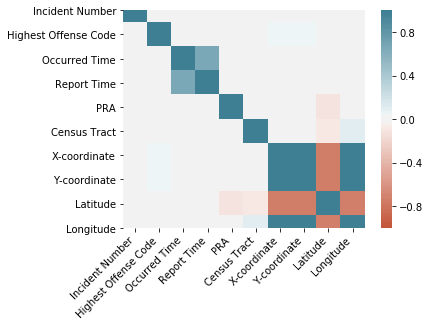

In [7]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Visualizations of crime incidents

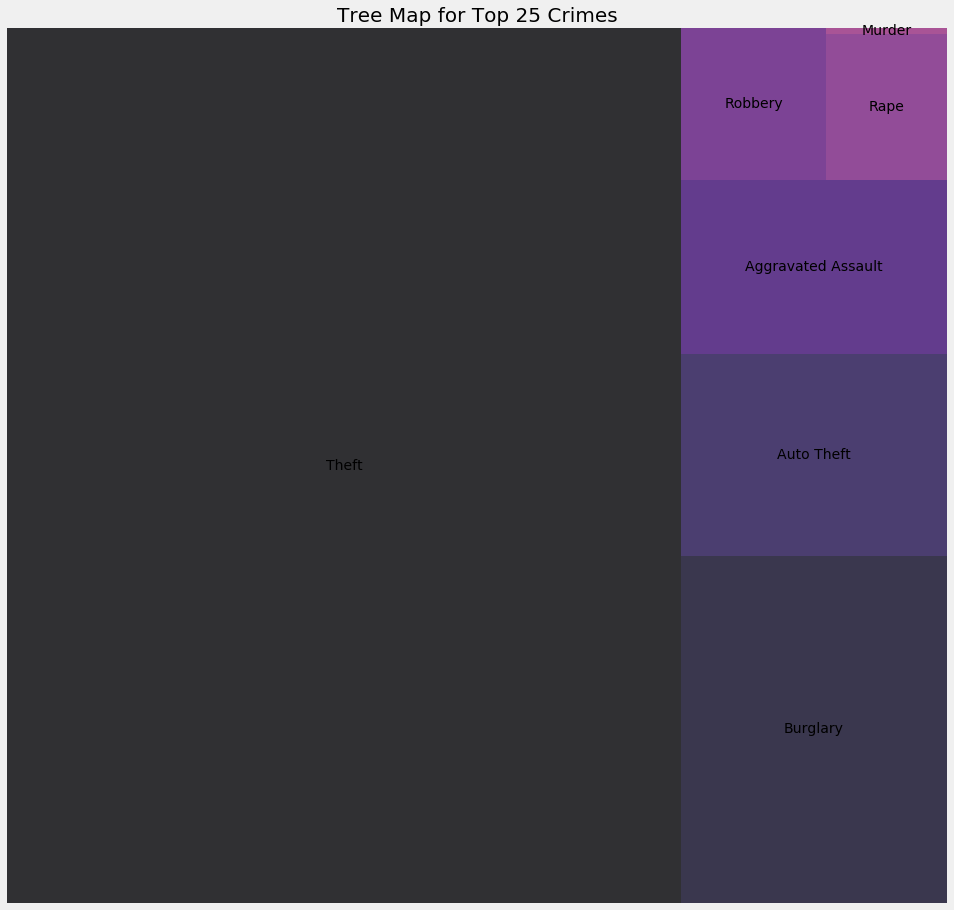

In [8]:
# plotting a tree map
y = data['Category Description'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

In [9]:
#Dropped all the nan values from the dataframe
dfcr = data.dropna()


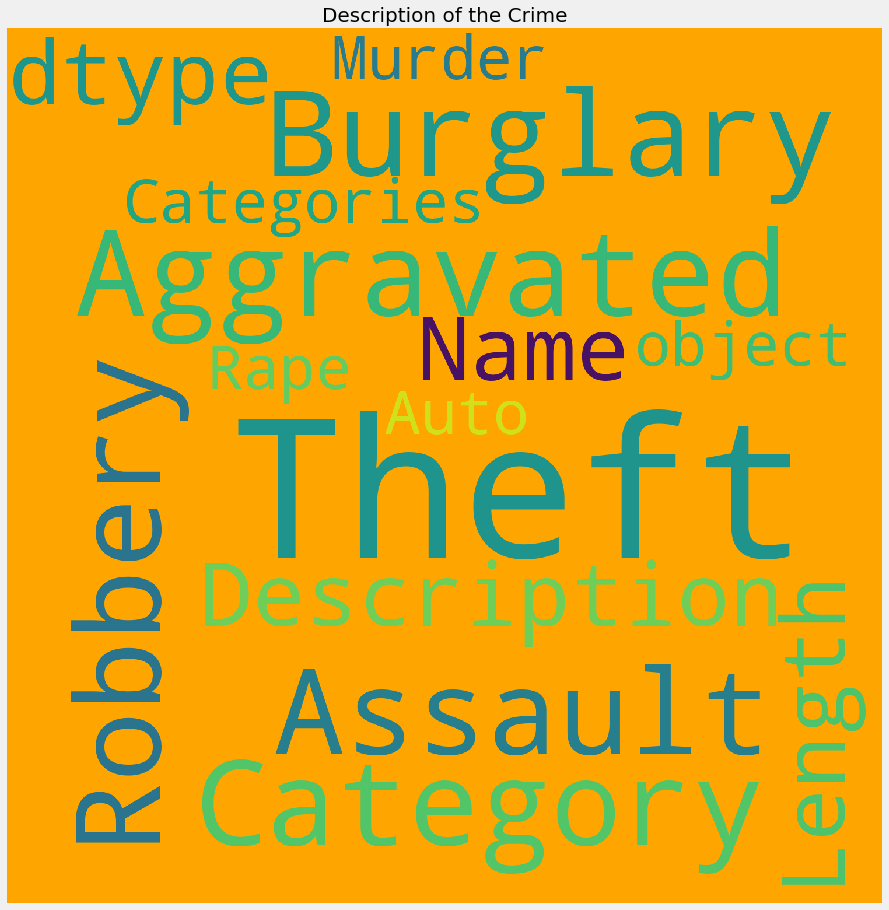

In [10]:
# description of the crime

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(dfcr['Category Description']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

C:\Users\Raghunandan\Anaconda3\Anaconda33\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

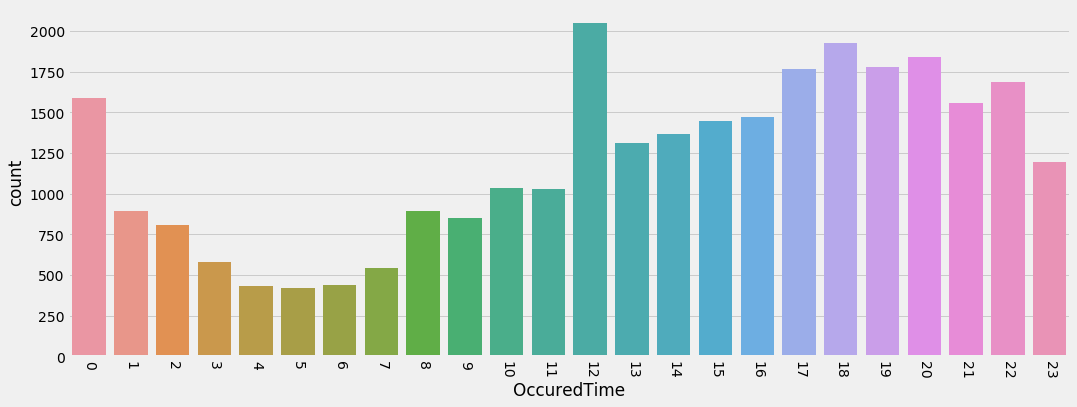

In [11]:
#Hourly distribution of crime in a day
dfcr['OccuredTime'] = pd.DatetimeIndex(dfcr['Occurred Date Time']).hour
plt.figure(figsize=(16,6))
sns.countplot(dfcr['OccuredTime'])
plt.xticks(rotation=-90)

Crime rate is lowest in the early hours of morning and highest around 12 noon.

In [12]:
dfnew = dfcr[dfcr['Latitude'].between(30.00012045,30.56225762)& dfcr['Longitude'].between(-98.0056819,-97)]
newper=len(dfnew)/len(dfcr)
print("retained data after removing geometric outliers:",newper*100,"%")

retained data after removing geometric outliers: 100.0 %


In [13]:
#Selecting crime events over 12 as the basis for analysis
counts = dfcr['Highest Offense Description'].value_counts()
ddf=dfnew[dfcr['Highest Offense Description'].isin(counts[counts >50].index)]
#https://stackoverflow.com/questions/30485151/python-pandas-exclude-rows-below-a-certain-frequency-count
newper2=len(ddf)/len(dfcr)
print("retained original data after dropping offenses with less than 50 frequency in the year:",newper2*100,"%")

retained original data after dropping offenses with less than 50 frequency in the year: 98.896537410495 %


In [14]:
# column Category Discription is dropped
#"UCR Category" dropped as it is the category of the crimes and this can be used for later visualisations but not for modelling now
#"Council District" also dropped as it is another address identifier
df = ddf.drop(['Category Description','UCR Category','Census Tract','Council District'],axis=1)

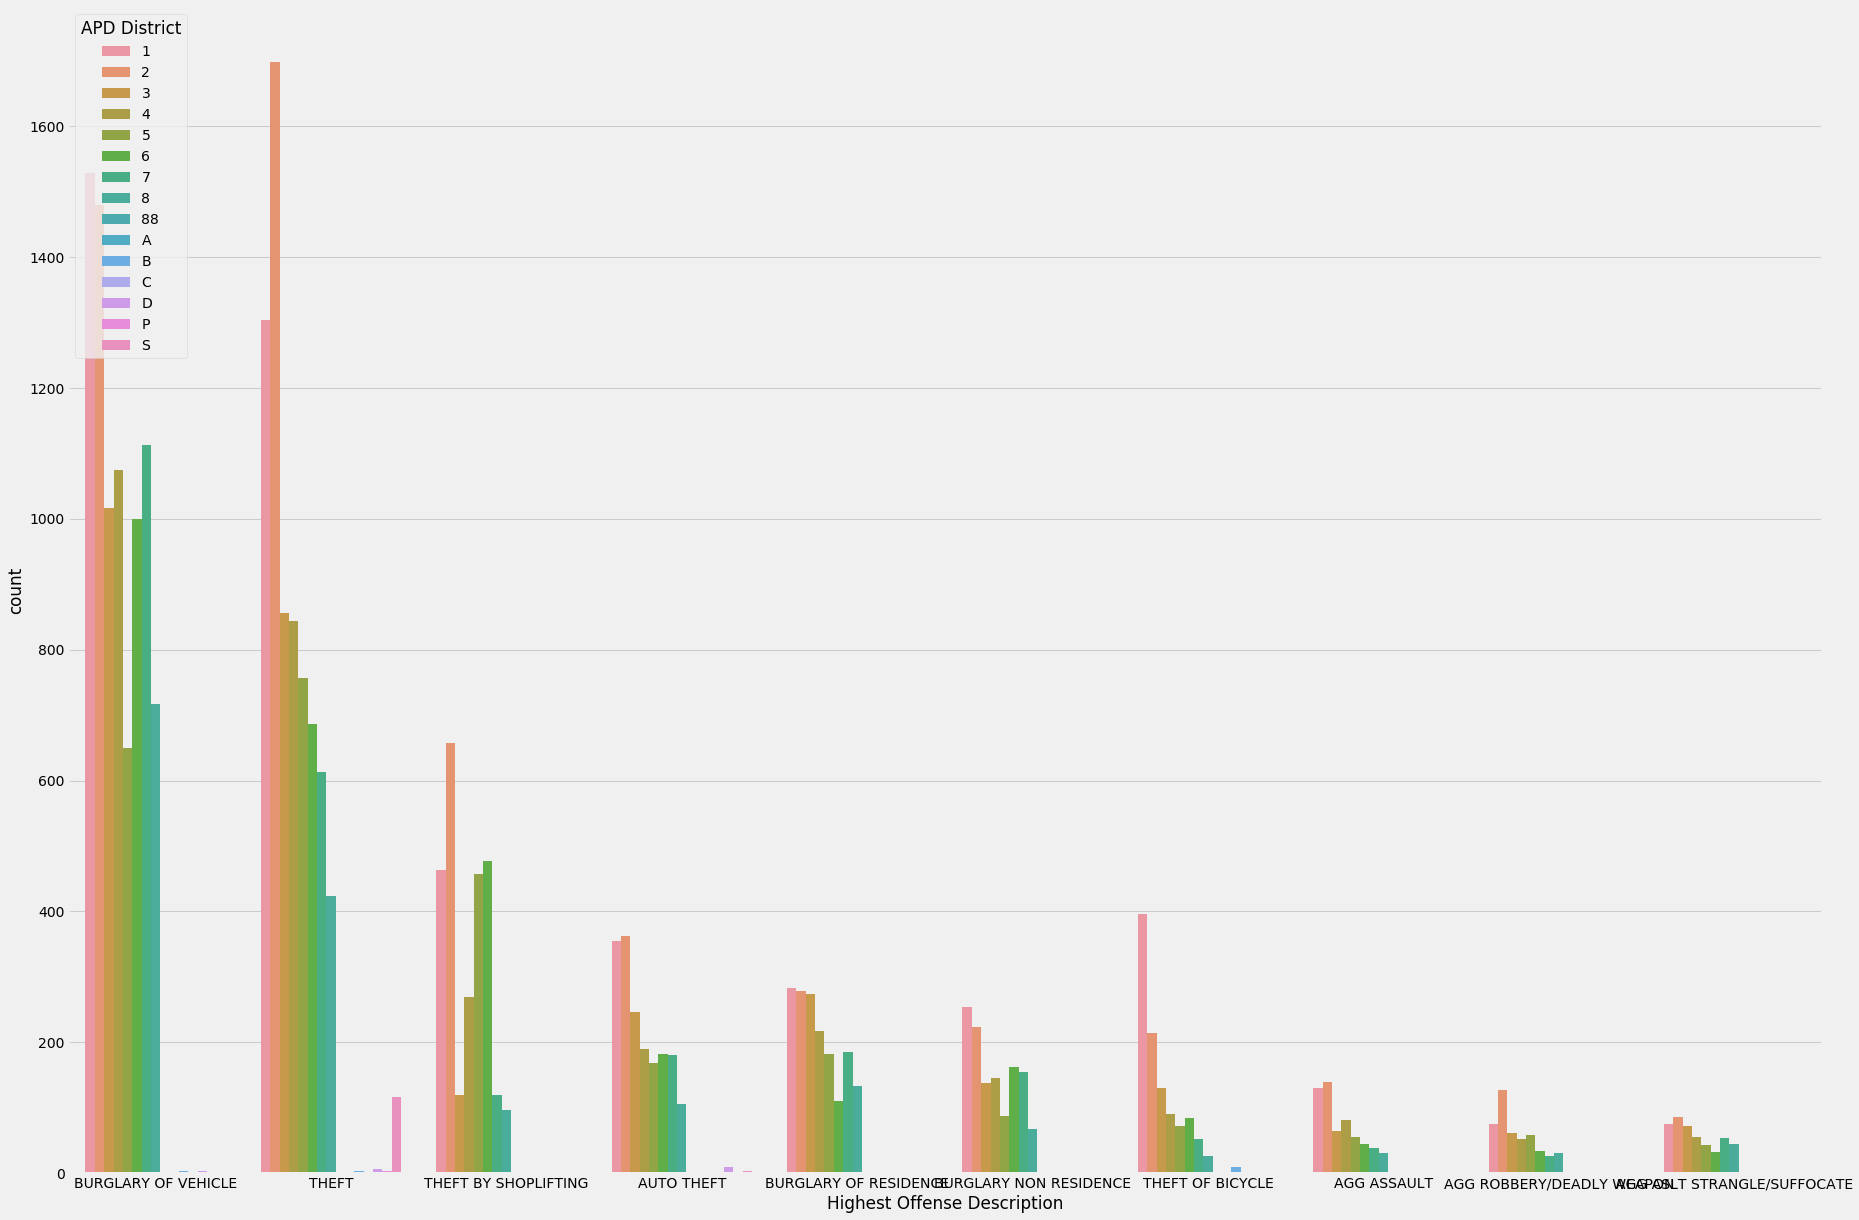

In [15]:
# First visualization we'll see how the top 10 incidents in districts 
order = df['Highest Offense Description'].value_counts().head(10).index
plt.figure(figsize=(28,20))
sns.countplot(data = dfnew, x='Highest Offense Description',hue='APD District', order = order)
# Family Disturbance, Burglary of vehicle and theft are the top three crimes in the city and their count is by far the 
# highest of them all. APD districts 1,2,P,3 and 4 are reporting high crime numbers.
#Reference: https://www.kaggle.com/tizzoks/boston-crime-visualization-my-first-kaggle

In [16]:
#Burglary crime Density
crime_coords = df[(df['Latitude'].isnull() == False) 
                  & (df['Longitude'].isnull() == False)
                 & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')]
                 
map_1 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_1.add_child(plugins.HeatMap(crime_coords[['Latitude', 'Longitude']].values, radius=15))
map_1

In [17]:
#Shoplifting Density
crime_coords = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'THEFT')]
map_1 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_1.add_child(plugins.HeatMap(crime_coords[['Latitude', 'Longitude']].values, radius=15))
map_1

In [18]:
#Shoplifting Density
crime_coords = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'THEFT BY SHOPLIFTING')]
map_1 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_1.add_child(plugins.HeatMap(crime_coords[['Latitude', 'Longitude']].values, radius=15))
map_1

In [19]:
#Add a new feature - delay in the reporting of crime
df['DelayInComplaint']=((pd.to_datetime(df['Report Date Time']) - 
                            pd.to_datetime(df['Occurred Date Time'])).dt.total_seconds() / 60)

In [20]:
#Converted the values to days of the week and boolean values
df['Family Violence'] = df['Family Violence'].map({'Y': 1, 'N': 0})
df['OccuredDay'] = df['Occurred Date Time'].dt.day_name()
df['ReportedDay'] = df['Report Date Time'].dt.day_name()
df['Clearance Date'] = df['Clearance Date'].dt.day_name()

In [21]:
#Dropped the columns, which are redundant and null.
dffinal =df.drop(['Incident Number','Occurred Date','Highest Offense Code','Occurred Date Time','Occurred Date','Occurred Time','Report Date Time','Report Date','Report Time','Location','PRA','Clearance Date','Address'],axis=1)
dffinal = dffinal.dropna()

In [22]:
#Created dummy cloumns for categorical variables
Cat_dummies = pd.get_dummies(dffinal[['Location Type','APD Sector','APD District','OccuredDay','ReportedDay']])

In [23]:
#Dropped the categorical variables and merged dummy variables
finaldf = pd.merge(dffinal.drop(['Location Type','APD Sector','APD District','Clearance Status','OccuredDay','ReportedDay','Zip Code'],1),Cat_dummies,left_index = True, right_index = True)

In [24]:
#Separated data for holdout and training
df1 = finaldf.iloc[:,0]
df2=finaldf.drop(['Highest Offense Description'],axis=1)
df1.head()

0             AGG ASSAULT
8         THEFT FROM AUTO
29                  THEFT
32    BURGLARY OF VEHICLE
33     ROBBERY BY ASSAULT
Name: Highest Offense Description, dtype: category
Categories (312, object): [ABUSE OF 911, AGG ASLT ENHANC STRANGL/SUFFOC, AGG ASLT STRANGLE/SUFFOCATE, AGG ASLT W/MOTOR VEH FAM/DAT V, ..., VOCO AMPLIFIED MUSIC/VEHICLE, VOCO SOLICITATION PROHIBIT, WARRANT ARREST NON TRAFFIC, WEAPON VIOL - OTHER]

Model is built by categoring the crimes into felony, class A demenour as 1 group and class B, Class C demenour as another group. The crimes in the first group are more severe in nature and care should be given to address them at the earliest. The model classifies the crimes into these two broad categores to start with.
Reference Url: https://github.com/matthede/PoliceNetwork/blob/master/syracusecrime.py

In [25]:
#Categorizing the crime into two categories depending on severity
# By combining top crimes and the link mentioned below.
#https://texaspolitics.utexas.edu/archive/html/just/features/0201_01/crimeandp.html
TypeofCrime = []
for x in finaldf['Highest Offense Description']: 
    if x in ('FAMILY DISTURBANCE','THEFT','DISTURBANCE - OTHER','RUNAWAY CHILD','AGG RAPE OF A CHILD','RAPE','RAPE OF A CHILD','AGG RAPE',
'ROBBERY BY ASSAULT','ROBBERY BY THREAT','AGG ROBBERY/DEADLY WEAPON','AGG ASLT STRANGLE/SUFFOCATE','AGG ASLT W/MOTOR VEH FAM/DAT V',
'BURGLARY OF RESIDENCE','BURGLARY NON RESIDENCE','CRIMINAL TRESPASS/HOTEL','DAMAGE CITY PROP',
'CRIMINAL MISCHIEF BY ARSON','DOC DISCHARGE GUN - PUB PLACE','DOC DISPLAY GUN/DEADLY PUB PLC','KIDNAPPING','WEAPON VIOL - OTHER','ROBBERY BY ASSAULT','ROBBERY BY THREAT',
'MURDER','AGG ASSAULT FAM/DATE VIOLENCE','ASSAULT BY CONTACT','ASSAULT ON PUBLIC SERVANT','ASSAULT W/INJURY-FAM/DATE VIOL','ASSAULT WITH INJURY',
'SEXUAL ASSAULT OF CHILD/OBJECT','CRIMINAL MISCHIEF','AUTO THEFT','BURGLARY OF VEHICLE'): 
        TypeofCrime.append(1)
    else:
        TypeofCrime.append(0)

df2['TypeofCrime'] = TypeofCrime

In [26]:
ddf1=df2.iloc[:28590]
df1=ddf1.iloc[:26280]
df2 = ddf1[~ddf1.index.isin(df1.index)]

In [27]:
#Separated the target variable as 'y' for modelling
df1['TypeofCrime'].unique()
y = df1['TypeofCrime']
X=df1.iloc[:,0:95]

In [28]:
#Preprocessed data is split into train and validation 
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
print("X train shape:",x_train.shape,"Y train shape:",y_train.shape)

X train shape: (21024, 95) Y train shape: (21024,)


In [29]:
#Import the dependencies for all the models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


# Classification models for crime event categorization

In [30]:
# 1. Logistic model is trained using the training data
Log_classifier = LogisticRegression()
Log_classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#Logistic model is evaluated using the validation data
y_log_pred = Log_classifier.predict(x_valid)
print("Score: ", accuracy_score(y_valid,y_log_pred))

Score:  0.7756849315068494


In [32]:
# 2. Logistic model with ridge regularization is trained using the training data

from sklearn.linear_model import RidgeClassifier
rclf=RidgeClassifier()
rclf.fit(x_train, y_train)
y_log_pred = rclf.predict(x_valid)
print("Score: ", accuracy_score(y_valid,y_log_pred))

Score:  0.7950913242009132


In [33]:
#3. Deicison tree model is trained using the training data
print ("DecisionTree")
dt = DecisionTreeClassifier()

# fit the training data to the model
decision_clf=dt.fit(x_train, y_train)

DecisionTree


In [34]:
#Fit decision model is evaluated using the validation data
y_dtpred = decision_clf.predict(x_valid)
print ("Acurracy: ", accuracy_score(y_valid, y_dtpred))

Acurracy:  0.7079528158295282


In [35]:
#4. Developed a Random forest model
rmclf  = RandomForestClassifier(n_estimators=100)
# fit the training data to the model
rmclf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
#print(clf.fit(trainDataGlobal, trainLabelsGlobal))
yrmpred = rmclf.predict(x_valid)
print ("Acurracy: ", accuracy_score(y_valid, yrmpred))

Acurracy:  0.7971841704718418


In [37]:
#5. Developed a gradient boost model
gdclf = GradientBoostingClassifier()
gdclf.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
#Validation of gradient boost model
ygbpred = gdclf.predict(x_valid)
print ("Acurracy: ", accuracy_score(y_valid, yrmpred))

Acurracy:  0.7971841704718418


In [39]:
#6. Create a neural network model and added layers
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=2, activation='softmax'))

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(
    x_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
 - 2s - loss: 6525.4143 - accuracy: 0.6942
Epoch 2/10
 - 1s - loss: 90.4546 - accuracy: 0.7636
Epoch 3/10
 - 1s - loss: 21.1251 - accuracy: 0.7671
Epoch 4/10
 - 1s - loss: 9.9315 - accuracy: 0.7691
Epoch 5/10
 - 1s - loss: 5.7038 - accuracy: 0.7702
Epoch 6/10
 - 1s - loss: 4.2258 - accuracy: 0.7705
Epoch 7/10
 - 1s - loss: 2.4183 - accuracy: 0.7704
Epoch 8/10
 - 1s - loss: 2.4268 - accuracy: 0.7707
Epoch 9/10
 - 1s - loss: 1.3872 - accuracy: 0.7707
Epoch 10/10
 - 1s - loss: 1.1514 - accuracy: 0.7708


In [42]:
model_loss, model_accuracy = model.evaluate(
    x_train, y_train, verbose=2)
print(
    f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.5382252065195522, Accuracy: 0.7708808779716492


## Make predictions

In [50]:
#Model with best accuracy in predicting serious crimes from the holdout data
y = df2['TypeofCrime']
X=df2.iloc[:,0:95]

yrmpred = rclf.predict(X)
print ("Acurracy: ", accuracy_score(y, yrmpred))
print(classification_report(y, yrmpred))

Acurracy:  0.8164502164502164
              precision    recall  f1-score   support

           0       0.55      0.33      0.41       453
           1       0.85      0.94      0.89      1857

    accuracy                           0.82      2310
   macro avg       0.70      0.63      0.65      2310
weighted avg       0.79      0.82      0.80      2310

